## Проект по информатике (Набережная Елизавета, Обухова Анастасия, Гуменная Яна)

#  1. Kiva и ее деятельность
***


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva - это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva - **Make a loan, change a life**

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 
Список заявок, назанчений и стран, нуждающихся в финансировании можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с Сельским хозяйством, Питанием, Здоровьем и гигиеной, Розничной торговлей и поддержкой малого бизнеса.

## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva профинансировала более 1 миллиарда долларов для 2 миллионов заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн. небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, финансируемых через Kiva, составляет $1,11 млрд.
* 97,0% - доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva - женщины
* Кредит Kiva финансируется каждые 2 минуты



## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Постановка задачи
***

Kiva хочет сделать так, чтобы собранные деньги тратились с максимальной пользой. В первую очередь, конечно же, их интересуют не статистические показатели, а ощутимые выводы и рекомендации, которые позволят им работать эффективнее и больше понимать специфику потребностей и уровень бедности в разных странах и регионах. 

#### Составим алгоритм данного исследования:
- Проверим, насколько имеющиеся данные чисты, то есть подвержены выбросам, пропущенным и недействительным значениям.
- Ознакомимся с датасетом, изучим его базовые характеристики, выявим первоначальные зависимости.
- Изучим основные демографические характеристики людей, которые используют Kiva. Поймем, из каких они регионов и стран, какова гендерная характеристика заемщиков.
- Посмотрим, для каких целей людям нужны средства и какие суммы они просят. Изучим сектора экономики, виды деятельности и сделаем выводы о том, как обстоят дела в каждом из них.
- Проанализируем, как долго заемщикам приходится ждать полного финансирования заявки.
- Попробуем изучить природу зависимости времени, требуемого на погашение ссуды и суммы кредита.
- Сформулируем основные выводы и визуальные материалы, подкрепляющие их.


## 1.4. Базы данных компании Kiva
***

**kiva_loans** - это набор данных, который содержит большую часть информации о займах:
- id - Уникальный идентификатор для кредита
- funded_amount - Сумма, выплаченная Kiva агенту на местах (USD)
- loan_amount - Сумма, выплаченная полевым агентом заемщику (USD)
- sector - Сектор использования займа
- activity - Более гранулированная категория
- use - Назначение использования суммы кредита
- country_code - ISO код страны страны, в которой был выдан заем
- country - Полное название страны, в которой был выдан кредит
- posted_time - Время, в которое заявка была опубликована на Kiva
- disbursed_time - Время, когда кредитный агент выдал заемщику сумму
- funded_time - Время, когда заявка полностью финансируется кредиторами
- term_in_months - Срок, на который был выдан кредит в месяцах
- lender_count - Общее количество кредиторов, которые внесли свой вклад в этот кредит
- loaner_genders - Разделенные запятыми буквы M, F, где каждый экземпляр представляет одного мужчину / женщину в группе

**kiva_mpi_region_locations** - набор данных, содержащий данные о регинах и показатели MPI:
(Global Multidimensional Poverty Index - глобальный индекс бедности) ряда регионов (субнациональных) в мире.  Чем больше это значение, тем выше бедность в соответствующем регионе 
- country - страна
- region - регион в стране
- world_region - часть света
- MPI - многомерный индекс бедности
- geo - координаты (широта, долгота)



# 2. Разведочный анализ данных
***

## 2.1. Импорт данных и первое знакомство с датасетом
***
Датасеты:
*  df_mpi
*  df_kiva_loans 


Импортируем необходимые библиотеки и загрузим предоставленные наборы данных:

In [2]:
# Импорт библиотек

import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

import warnings
warnings.filterwarnings("ignore")  

In [3]:
df_kiva_loans = pd.read_csv("C:/Users/gunen/OneDrive/Рабочий стол/инфа/Проект/kiva_loans.csv", parse_dates=['posted_time', 'disbursed_time', 'funded_time'])
df_mpi = pd.read_csv("C:/Users/gunen/OneDrive/Рабочий стол/инфа/Проект/kiva_mpi_region_locations.csv")

Для начала наша задача состоит в том, чтобы взглянуть на небольшой кусочек предоставленных данных:

In [4]:
df_mpi.head(5)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [5]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


Посмотрим на наличие пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе:

<AxesSubplot:>

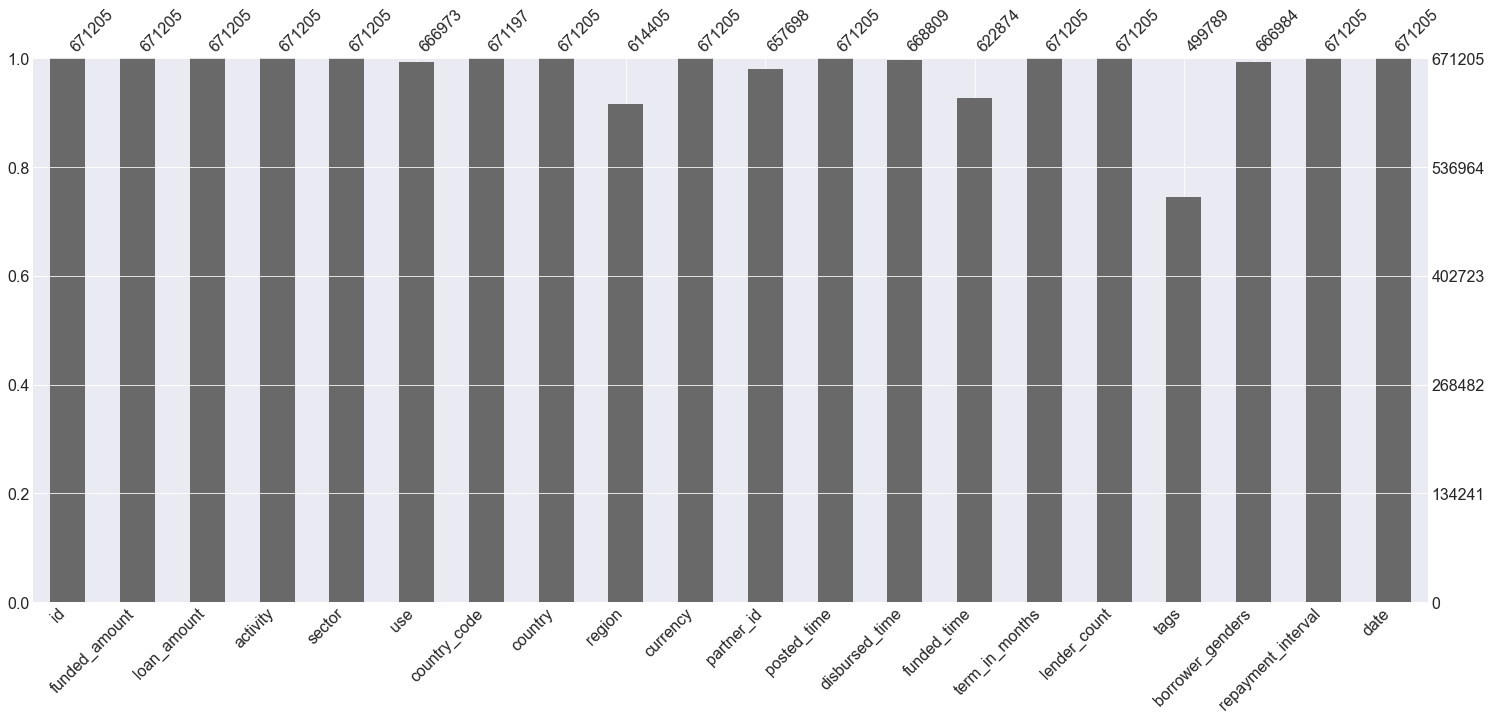

In [6]:
msno.bar(df_kiva_loans)

<AxesSubplot:>

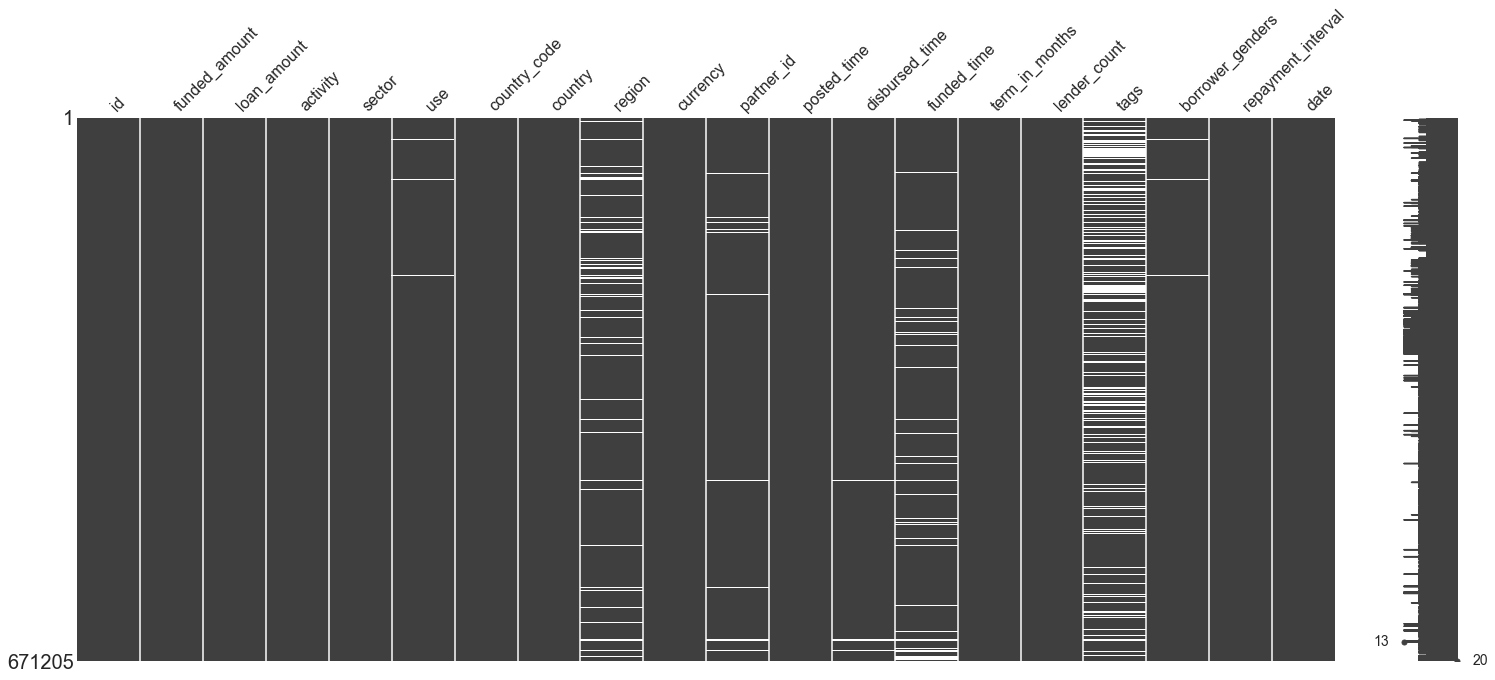

In [7]:
msno.matrix(df_kiva_loans)

Столбец тегов содержит много пропущенных значений. Также столбец с датой, когда запрашиваемая сумма была собрана на платформе Kiva, имеет около 8% пропусков. Это может означать либо то, что сумма пока не собрана, либо то, что она не была отражена в выгрузке корректно.

Следующим шагом приступим к изучению каждого атрибута датасета по отдельности и выведем ряд статистик для каждого из них:

In [8]:
df_kiva_loans.dtypes

id                                  int64
funded_amount                     float64
loan_amount                       float64
activity                           object
sector                             object
use                                object
country_code                       object
country                            object
region                             object
currency                           object
partner_id                        float64
posted_time           datetime64[ns, UTC]
disbursed_time        datetime64[ns, UTC]
funded_time           datetime64[ns, UTC]
term_in_months                    float64
lender_count                        int64
tags                               object
borrower_genders                   object
repayment_interval                 object
date                               object
dtype: object

In [9]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [10]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,27088,426502,342717,1308


**Первые очевидные результаты и выводы, которые можно сделать:**
* В этом датасете содержатся данные о **87** странах, где люди запрашивали помощь на финансирование проектов.
* Страной с самым большим количеством займов являются **Филиппины**.
* Наиболее популярной категорией является **Сельское хозяйство**.
* Довольно широкий разброс значений по ряду числовых атрибутов, таких как, например, сумма займа, срок погашения кредита.
* В этом наборе данных **11298** разных значений пола! Очевидно, это невозможно. Надо будет обязательно попытаться понять, почему у нас такой набор значений.
* Среднее финансирование в мире составляет **786** долларов, а медианное финансирование - **450** долларов. Возможно это означает, что есть небольшая доля заявок с крупными суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявки.
* Что еще более важно: есть только **1298** различных дат, в которые были опубликованы заявки на кредиты. Если мы подсчитаем соотношение, то это означает, что в Kiva ежедневно выдается более **500** займов. Это дает нам четкое представление о том, насколько важна эта платформа и какое влияние она оказывает.


# 2.2. Пользователи Kiva

### 2.2.1. Из каких стран эти люди? 
Из исходного файла
***

Чтобы получить наиболее (статистически) значимые результаты, оставим только те страны, которые составляют не менее 0,5% сообщества Kiva.


In [11]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [12]:
countries

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: country, dtype: int64

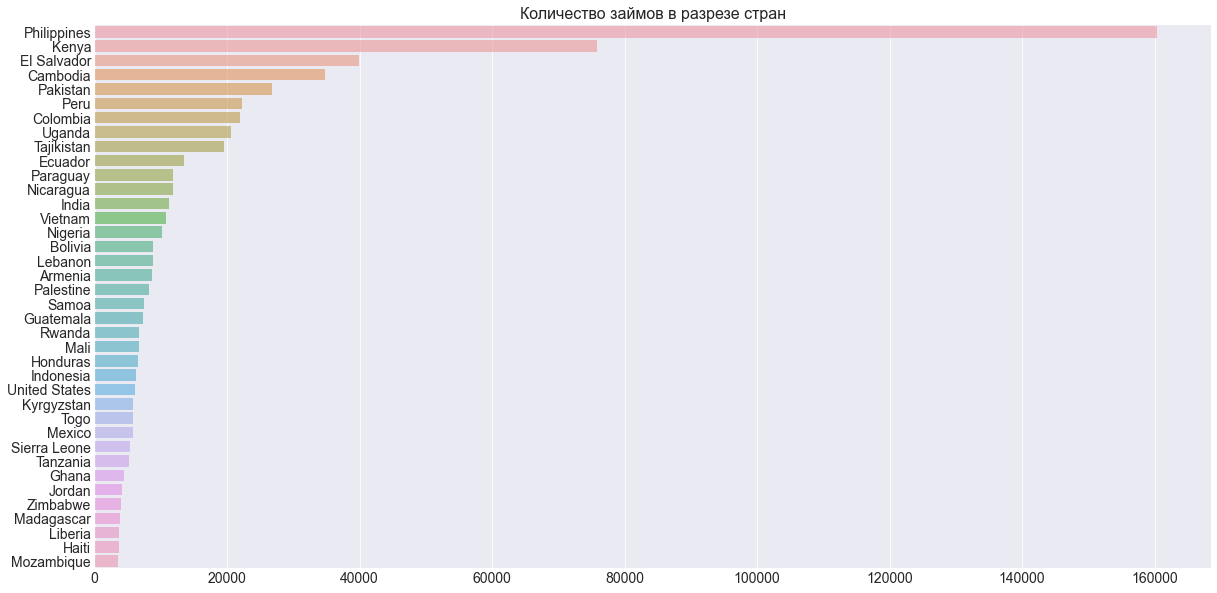

In [13]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

**Почему на Филиппинах наибольшее количество займов?**

Чуть менее четверти всех займов приходится на Филиппины.

Скорее всего, это связано с тем, что там широко распространены краткосрочные и небольшие займы.
Запомним это предположение и внимательнее рассмотрим его позже. Такая стратегия может оказаться наиболее эффективной для точечного и обширного финансирования в условиях бедности и ограниченных возможностей локальных государств.

Мы также можем заметить, что в списке присутствует множество африканских стран, таких как Кения, Мали, Нигерия, Гана. Нет ни одной страны Европейского Союза. Удивительным стало присутствие США в этом списке, поскольку уровень бедности в США не такой, как в других странах. 

Попробуем сгруппировать страны по частям света

Для этого воспользуемся файлом **kiva_mpi_region_locations**

In [14]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [15]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [16]:
df_kiva_loans_world_region = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [17]:
regions = df_kiva_loans_world_region['world_region'].value_counts()

In [18]:
regions_list = regions.index.to_list()

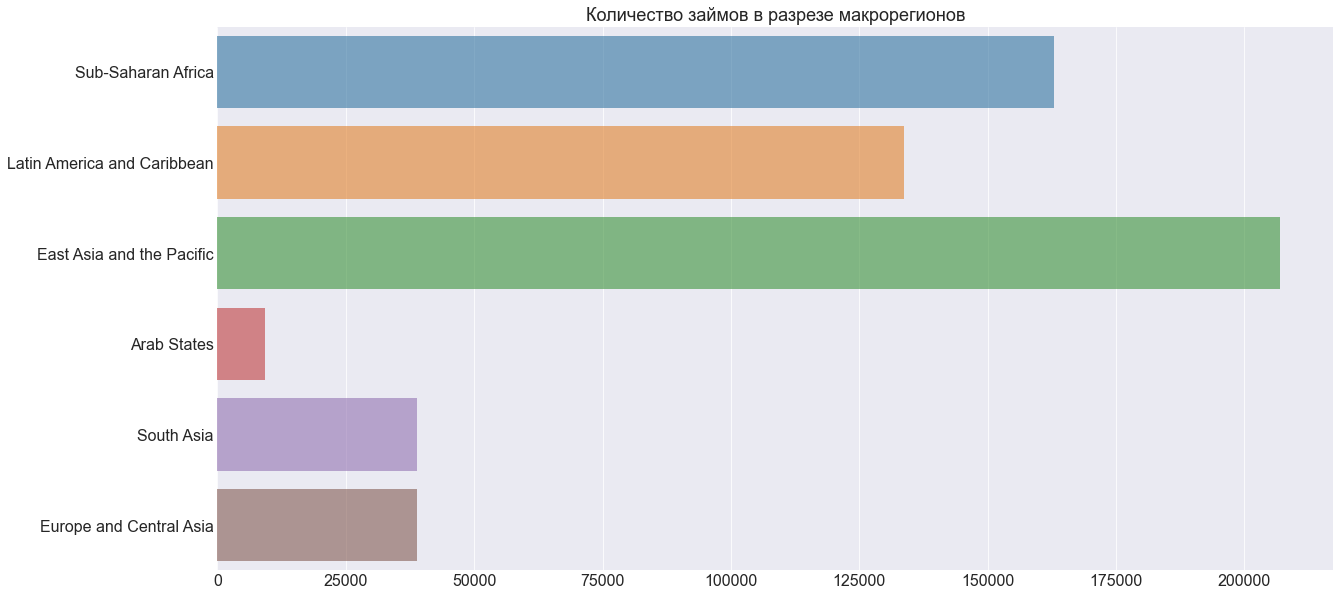

In [19]:
regions_mpi = df_mpi['world_region'].value_counts()
list_regions = list(regions_mpi.index)

plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, order = list_regions,  alpha=0.6)
plt.title("Количество займов в разрезе макрорегионов", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

Очевидным становится наличие 3-х лидеров и 3-х отстающих по количеству выданных займов

Исходя из этого, можно предположить, что в 3 регионах-отстающих либо нет острой потребности в присутствии Kiva (относительно богатые регионы), либо платфоома Kiva пока не набрала те обороты, что мы видим в 3 регионах-лидерах. Присутствие региона "Арабские страны" свидетельствует в пользу первого предположения.

### 2.2.2. Люди какого пола обращаются за финансированием?
***

In [20]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                                                                                        426502
male                                                                                                                                                                                                                                                                                                          134710
female, female                                                                                                                                                                                                                                                                                                 12164
female, female, female                                                   

Во многих займах, заемщик на самом деле не один человек, а группа людей, у которых есть общий проект. В наборе данных они перечислены как «женщина, женщина, женщина» или «мужчина, женщина». Это объясняет 12к полов, которые мы обнаружили ранее: каждая такая комбинация считается отдельно.

Давайте использовать метку **group** для этих заемщиков на круговой диаграмме.

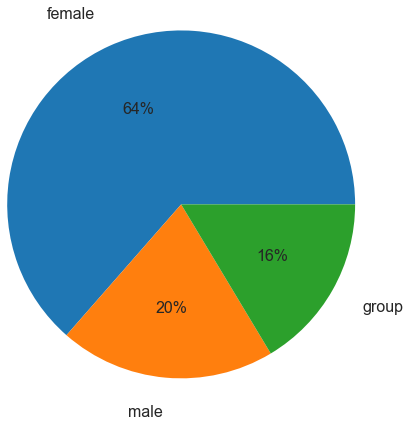

In [21]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]

borrowers = df_kiva_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

Выясняется, что большинство заемщиков - женщины, это весьма неожиданно. 

**Что это может означать?**

Например то, что женщины используют Kiva, чтобы получить финансирование и развивать собственные проекты в странах (большинство из которых являются странами третьего мира), где традиционно женщинам это было сделать крайне тяжело.

**В каких странах подавляющее большинство заемщиков - женщины?**

In [22]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

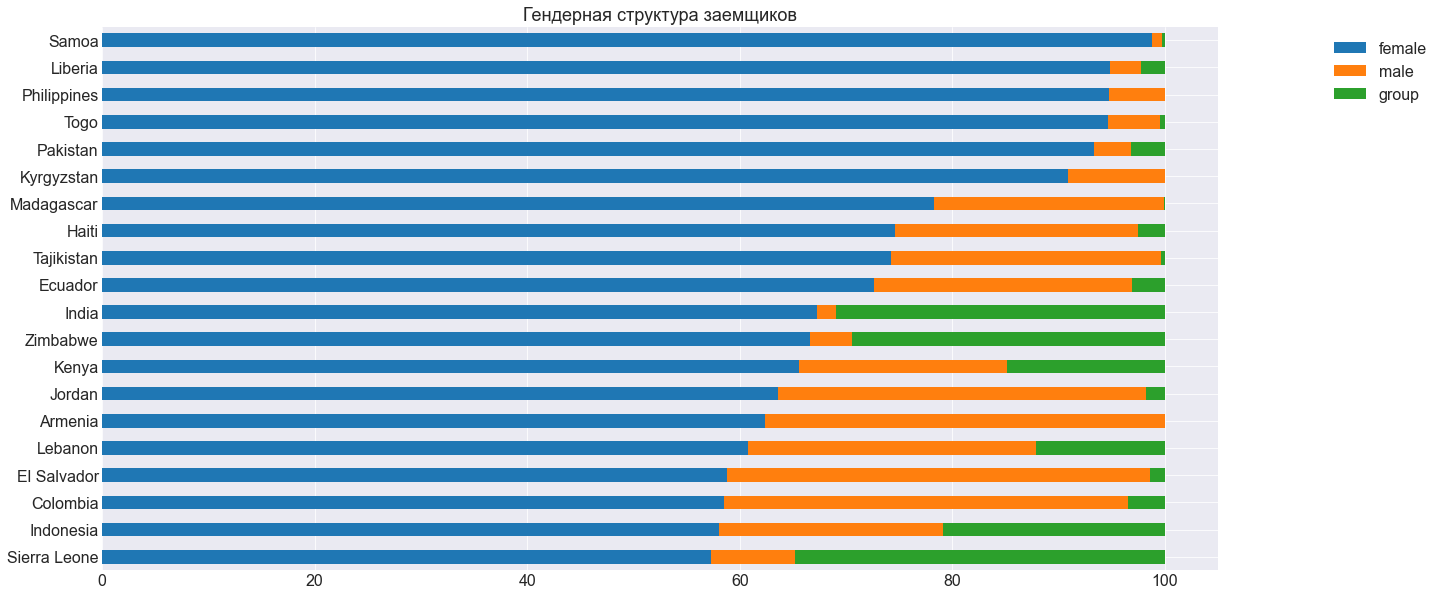

In [23]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**С чем может быть связана преобладающая доля женщин в структуре заемщиков в разрезе стран?**

Например, в связи с направлениями традиционно ассоциирующимися с женщинами: различного рода точки общественного питания и закусочные, магазины одежды и товаров для дома, бытовые услуги, выращивание сельскохозяйственных культур

Также можем отметить наличие в списке стран с преобладающей религией Ислам, в которых женщине пока, к сожалению, отводится второстепенная роль в принятии решений. 
Kiva позволяет получать бОльшие возможности и перспективы в тех регионах, где ранее это было вряд ли доступно.

**В каких странах подавляющее большинство заемщиков - мужчины?**

In [24]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

df_male = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])

   
df_male = df_male[['male', 'female', 'group']]
df_male = df_male[(df_male['male'] >= df_male['female']) & (df_male['male'] >= df_male['group'])]
df_male

borrower_genders,male,female,group
country,,,
Mexico,34.767462,34.488765,30.743773
Uganda,48.701519,39.876705,11.421776
Palestine,64.601445,35.214889,0.183666
Nigeria,87.134964,11.986977,0.878058


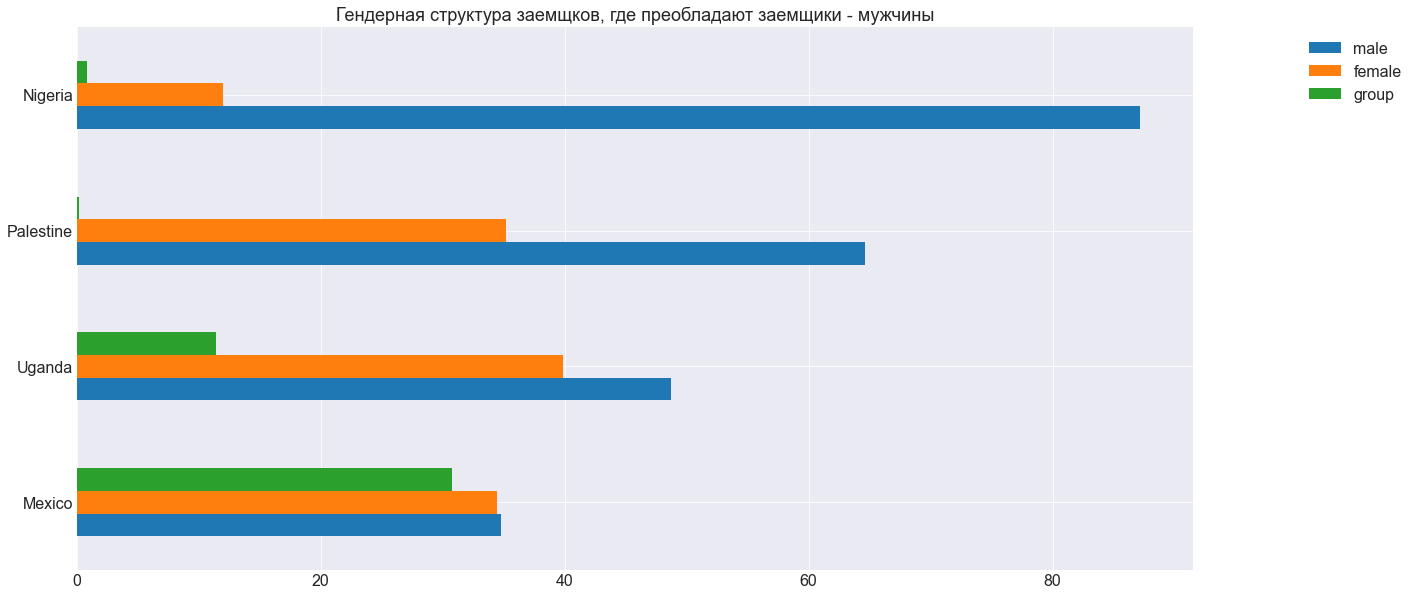

In [25]:
plot = df_male.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , title='Гендерная структура заемщков, где преобладают заемщики - мужчины'
       )
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

  **С чем может быть связана преобладающая доля мужчин в некоторых странах?**

Так как всего представлено 87 стран, 4 страны, с большинством заемщиков мужчин скорее исключениее, чем какая-то закономерность. 

Стоит так же отметить, что весомое преимущество заемщиков мужчин только в 2-х странах: **Нигерии** и **Палестине**.

Такое распределение может быть связано с сильным ущемеление женских прав, в частности решение мужчин о том, что женщина - "хранительница очага".

**В каких странах подавляющее большинство заемщиков - группы?**

In [26]:
df_group = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['group', 'female'])

   
df_group = df_group[[ 'group', 'female', 'male']]
df_group = df_group[(df_group['group'] >= df_group['female']) & (df_group['group'] >= df_group['male'])]
df_group

borrower_genders,group,female,male
country,,,
Rwanda,42.746845,34.387528,22.865627
Paraguay,55.053348,25.817021,19.129631
Ghana,57.933242,25.971651,16.095107
Tanzania,59.149262,30.503928,10.346810
Guatemala,62.640219,17.045144,20.314637
Cambodia,73.682398,20.949592,5.368010
Mali,91.836120,3.328815,4.835066


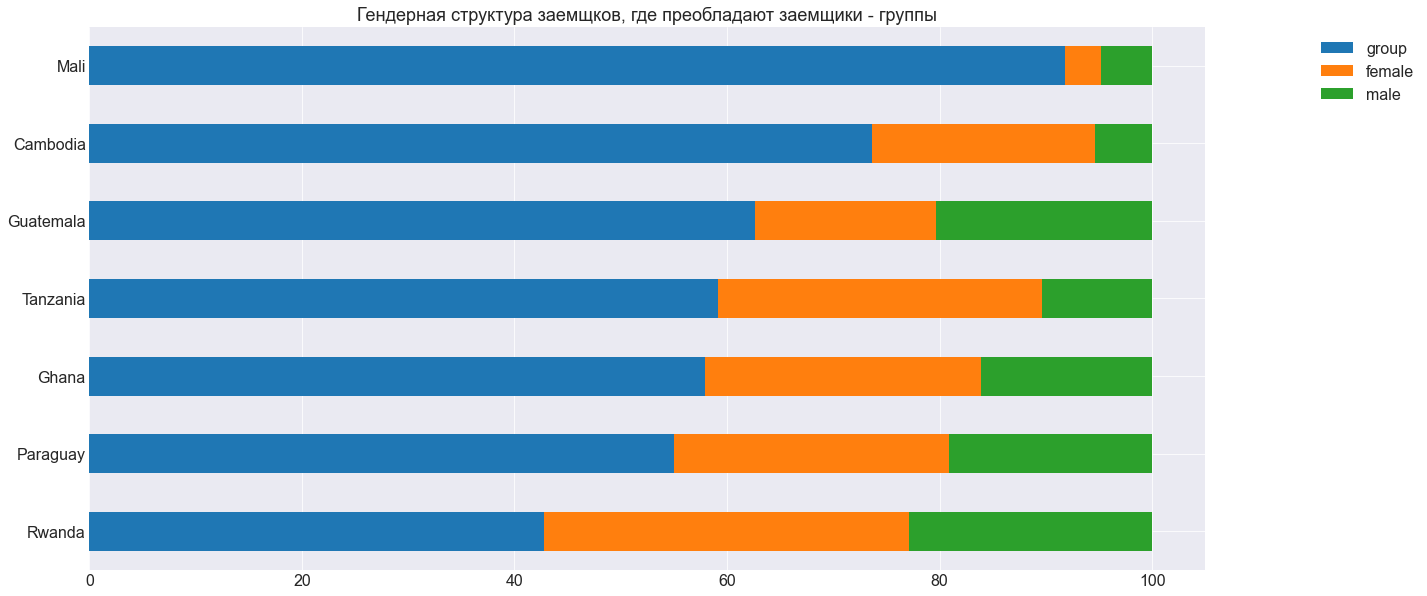

In [27]:
plot = df_group.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщков, где преобладают заемщики - группы'
       )
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [28]:
#посмотрим где находятся страны, чтобы лучше понять закономерности
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

    
df_group_merged = df_group.merge(df_mpi_grouped, on='country', how='left')
df_group_merged

,country,group,female,male,ISO,world_region,MPI
0,Rwanda,42.746845,34.387528,22.865627,RWA,Sub-Saharan Africa,0.242800
1,Paraguay,55.053348,25.817021,19.129631,NaN,NaN,NaN
2,Ghana,57.933242,25.971651,16.095107,GHA,Sub-Saharan Africa,0.183500
3,Tanzania,59.149262,30.503928,10.346810,NaN,NaN,NaN
4,Guatemala,62.640219,17.045144,20.314637,GTM,Latin America and Caribbean,0.113957
5,Cambodia,73.682398,20.949592,5.368010,KHM,East Asia and the Pacific,0.164053
6,Mali,91.836120,3.328815,4.835066,MLI,Sub-Saharan Africa,0.444833


  **С чем может быть связана преобладающая доля групп в некоторых странах?**

7 стран из 87 не дают нам понять общий тренд, а лишь выстроить план работы в данных странах.

Данные страны находятся рядом с экватором, возможно данные погодные условия, уровень жизни, уровень образованности влияют на умение кооперироваться или делают невозможным работу в одиночку.

### 2.2.3. Анализ зависимости пола заемщика от сектора экономики


In [29]:
sectors = df_kiva_loans.groupby('sector').count()
list_sectors = list(sectors.index)
list_sectors

['Agriculture',
 'Arts',
 'Clothing',
 'Construction',
 'Education',
 'Entertainment',
 'Food',
 'Health',
 'Housing',
 'Manufacturing',
 'Personal Use',
 'Retail',
 'Services',
 'Transportation',
 'Wholesale']

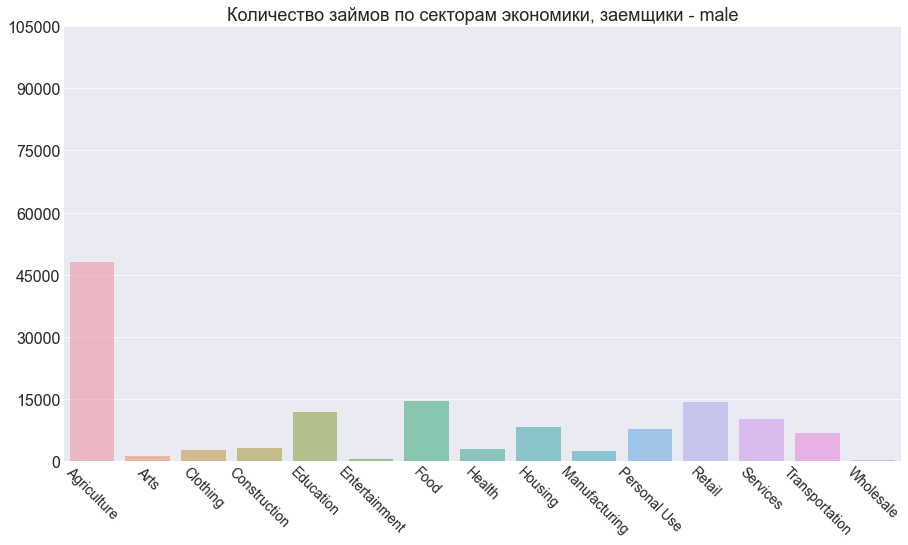

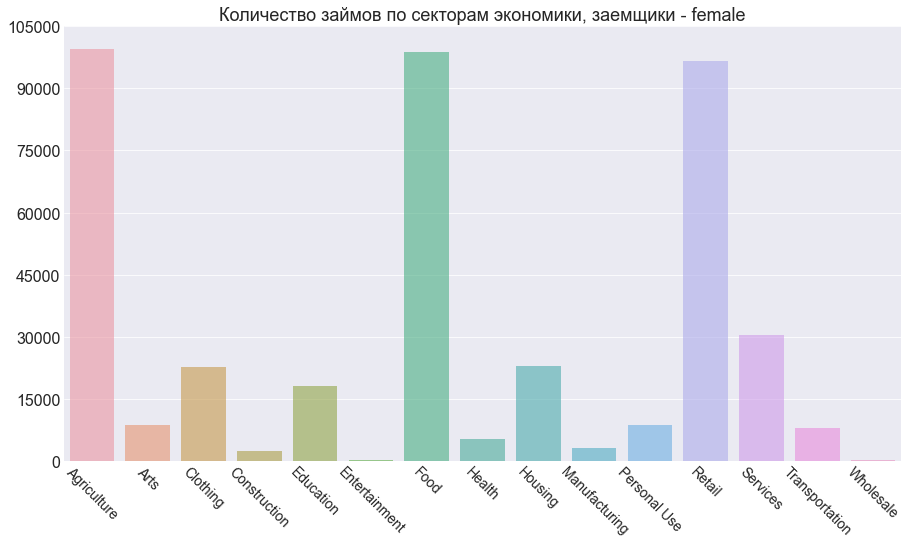

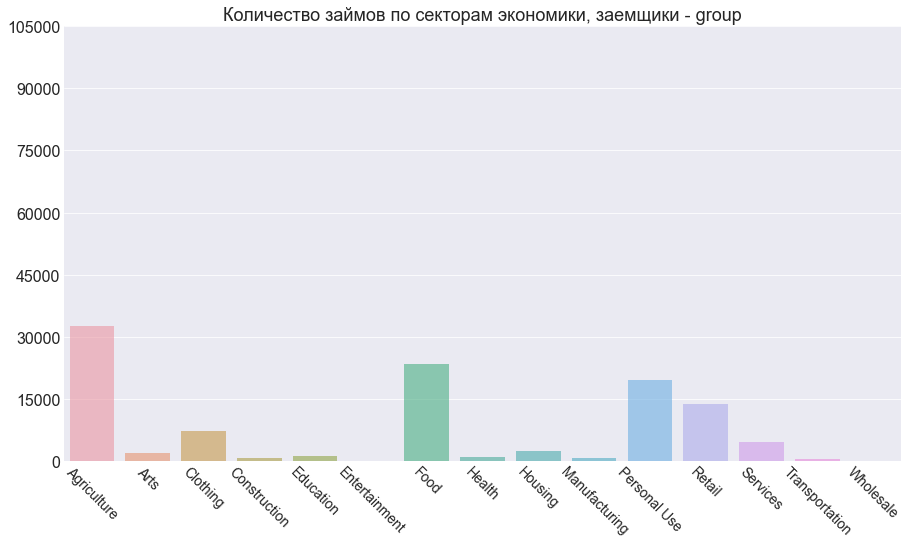

In [30]:
genders = ['male', 'female', 'group']
sectors = df_kiva_loans.groupby('sector').count()
list_sectors = list(sectors.index)

data_female = df_kiva_loans[df_kiva_loans['borrower_genders'] == 'female']['sector'].value_counts()

for i, gender in enumerate(genders):
    
    plt.figure(figsize=(15,8))
    data = df_kiva_loans[df_kiva_loans['borrower_genders'] == gender]['sector'].value_counts()
    
        
    sns.barplot(x = data.index, y = data.values, order = list_sectors,  alpha=0.6)

    plt.title("Количество займов по секторам экономики, заемщики - " + str(gender), fontsize=18)
    plt.tick_params(axis = 'y', labelsize = 16)
    plt.tick_params(axis = 'x', rotation = - 45, labelsize = 14 )
    plt.yticks(list(range(0, data_female.max() + 10000, 15000)) )
    plt.show();


**Основные выводы: зависимость пола заемщика от сектора экономики**

**Заемщики - мужчины**

1. Их больше всего занимает область сельского хозяйства, которая является фаворитом с огромным отрывом. Это может быть связано со спецификой работы или они выбрали наиболее понятную область, через которую можно обеспечить свою семью необходимым.

2. Три выделяющихся сектора экономики - Ритейл, Еда, Образование
Два первых сектора в целом являются наиболее популярными. Наличие среднего количества заявок в секторе образование должно быть связано с кредитами на образовнаие свое или детей.


**Заемщики - женщины**

1. Сельское хозяйство, еда, ритейл - лидеры.

2. Заявок в секторах экономики Одежда и Искусство больше у девушек. Связано с тем, что темы являются более близкими для женщин.


**Заемщики - группы**

1. Лидеры - сельское хозяйство, еда и займы для персонального использования.

2. Количество займов для персонального использования много именно у групп, должно быть это связано с тем, что займы берут муж и жена, например, или родители и дети, соседи, для того, чтобы обеспечить свою семью чистой водой или санитарным туалетом. 

# 2.3 Количество займов

1. Определим количество займов в разрезе секторов экономики.
2. Определим количество займов в разрезе видов деятельности.
3. Составим рейтинг из целевых назначений для займа.
4. Проанализируем наиболее популярные виды деятельности по каждому сектору
экономики
(сгруппируем займы по sector, activity, отобразим группы на отдельных графиках).
5. Исследуем влияние такого атрибута-займа, как «Количество кредиторов (lender_count) на
суммы и сроки займов».

# 2.3.1 Количество займов в разрезе секторов экономики

Количество займов в разрезе секторов экономики:


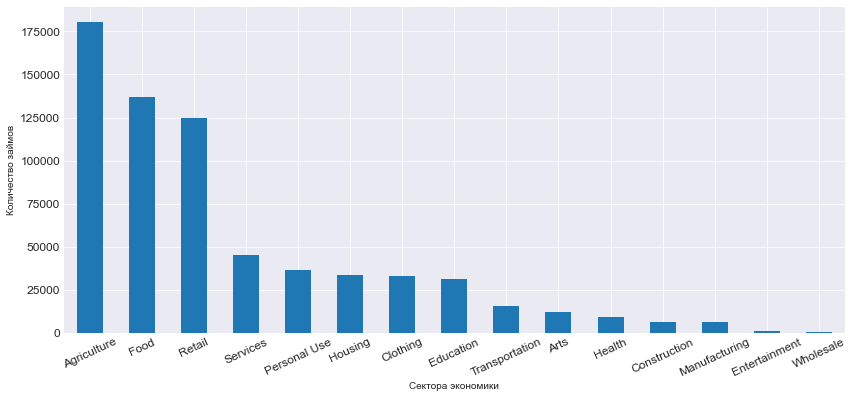

In [31]:
# Группировка данных по секторам с подсчетом записей
group_by_sector = df_kiva_loans.groupby('sector').size().sort_values(ascending=False)
group_by_sector.plot(kind="bar", rot=25, fontsize=12, figsize=(14, 6), xlabel="Сектора экономики", ylabel="Количество займов")
print("Количество займов в разрезе секторов экономики:")

In [32]:
# Количество займов в разных сектарах и их процентное соотношение
print("Количество займов в разных сектарах и их процентное соотношение")
pd.DataFrame({'Количество': group_by_sector, 'Процент': group_by_sector / sum(group_by_sector) * 100})

Количество займов в разных сектарах и их процентное соотношение


,Количество,Процент
sector,,
Agriculture,180302,26.862434
Food,136657,20.359950
Retail,124494,18.547836
Services,45140,6.725218
Personal Use,36385,5.420848
Housing,33731,5.025439
Clothing,32742,4.878092
Education,31013,4.620496
Transportation,15518,2.311961


**Основные выводы**: количество займов в разрезе экономики

1. Как мы видим, большая часть займов 
приходится на агрокультуру - 27%, чуть меньше на еду - 20% и 18% на розничную торговлю. Данные отрасли - явные лидеры по количеству займов. В данных секторах экономики очень важна закупка, как правило - это относительно небольшие суммы. Скорее всего, данные виды деятельности выбились в лидеры из-за низкого порога входа на рынок и ,соответственно, большого количества мелких продавцов.

2. Наименьшие займы приходятся на ряд отраслей (производство, оптовые продажи, здоровье, искусство), в которых частно присутствуют игроки-гиганты и необходимы узкие знания по темам. Также еще одной причиной может быть непопулярность (возможно, низкая необходимость) данных сфер в частях мира, количество займов в которых довольно много. Так в бедных странах Африки и Южной Америки необходимо прежде всего перекрыть базовые потребности в еде, воде, предметах первой необходимости и только потом заниматься, например, развлечениями.

3. Последнюю теорию доказывают сектора, которые находятся в середине рейтинга (сервис, одежда, образование, жилье).

# 2.3.2 Количество займов в разрезе видов деятельности

Наиболее популярные виды деятельности:


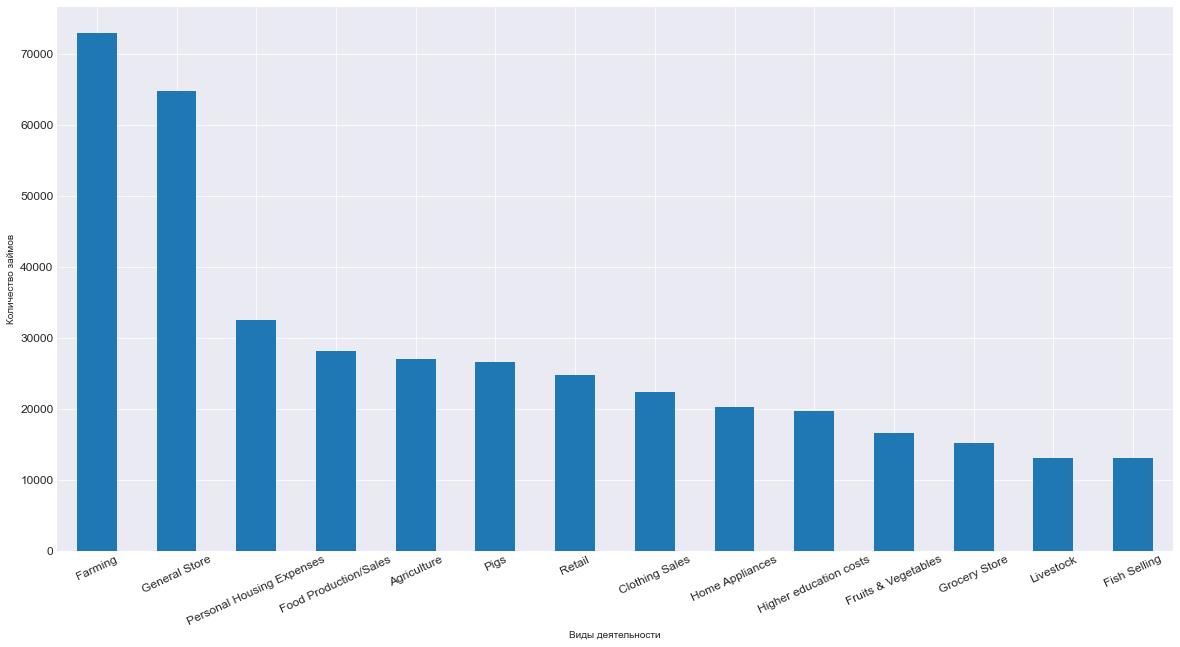

In [33]:
# Группировка данных по видам деятельности с подсчетом записей
group_by_activity = df_kiva_loans.groupby('activity').size().sort_values(ascending=False)

print("Наиболее популярные виды деятельности:")
group_by_activity[:14].plot(kind="bar", rot=25, fontsize=12, figsize=(20, 10), xlabel="Виды деятельности", ylabel="Количество займов")
plt.show()

In [34]:
# Количество займов в разных видах деятельности и их процентное соотношение
print("Количество займов в разных видах деятельности и их процентное соотношение")
pd.DataFrame({'Количество': group_by_activity, 'Процент': group_by_activity / sum(group_by_activity) * 100})

Количество займов в разных видах деятельности и их процентное соотношение


,Количество,Процент
activity,,
Farming,72955,10.869258
General Store,64729,9.643701
Personal Housing Expenses,32448,4.834291
Food Production/Sales,28106,4.187394
Agriculture,27023,4.026043
...,...,...
Film,13,0.001937
Personal Care Products,7,0.001043
Celebrations,5,0.000745


**Основные выводы** : количество займов в разрезе видов деятельности

1. По полученным данным мы увидели более детально, на что люди берут займы. График дает нам понимание, что востребовано у людей и в каких видах деятельности им нужна поддержка.

2. Два явных лидера - **Фермерство** и **Универсамы**. Так как большинство заемщиков находится в бедных странах, они пытаются закрыть высокий спрос на "самое нужное". Также вероятно, что фермерство является абсолютным лидером из-за моды на здоровое питание в развитых странах.

3. Дальнейшие виды деятельности - это то, с чем человек сталкивается в развивающейся/развитой стране довольно частно.

4. Интересно, что люди занимаются свиноводством, хотя казалось, что большое количество заемщиков исповедуют Ислам, должно быть это связано с тем, что огромное количество людей любят бекон.

# 2.3.3 Составьте рейтинг из целевых назначений для займа.

In [35]:
# Группировка данных по видам деятельности с подсчетом записей
group_by_use = df_kiva_loans.groupby('use').size().sort_values(ascending=False)

print("Наиболее популярные назначения займа (топ-20):")
for i in group_by_use[:20].items():
  print(f'{i[0]}: {i[1]} человек')

Наиболее популярные назначения займа (топ-20):
to buy a water filter to provide safe drinking water for their family.: 5217 человек
to buy a water filter to provide safe drinking water for her family.: 4082 человек
To buy a water filter to provide safe drinking water for their family.: 2141 человек
to build a sanitary toilet for her family.: 1708 человек
to build a sanitary toilet for her family: 1599 человек
to buy ingredients for her food production business: 1419 человек
to purchase more groceries to sell.: 1409 человек
to buy feed and other supplies to raise her pigs.: 1405 человек
to buy fertilizers and other farm supplies.: 1280 человек
to buy a water filter to provide safe drinking water for his family.: 1261 человек
to buy feed and vitamins for her pigs.: 1154 человек
to buy feeds and other supplies to raise her pigs: 1027 человек
to buy fertilizers and other farm supplies: 970 человек
to buy additional stocks of groceries to sell.: 888 человек
to buy a solar lantern.: 881 чело

1. Наиболее популярная причина для взятия займа - покупка фильтра для обеспечения питьевой водой. Это говорит о том, что больше всего программа популярна в бедных странах, среди людей, которые не живут, а пытаются выжить. Kiva - должно быть их единственная опора, возможность сделать жизнь лучше.
Этот факт показывает, что Kiva в первую очередь про идею, а не про деньги.

2. Интересно, что люди охотнее выбирают заемщиков в сферах, которые закрывают нужды, а не занимаются предпринимательством. Это значит, что более богатые люди действительно озабочены уровнем жизни остальных и готовы его повышать.

3. Также людей заботит экология:
* to buy a solar lantern : 881 человек
* to purchase a solar light and gain access to cost efficient hybrid seeds and fertilizer for maize cultivation : 866 человек.

# 2.3.4. Влияние такого атрибута займа, как «Количество кредиторов (lender_count) на суммы и сроки займов».

In [36]:
dependence_lender_count = df_kiva_loans[['lender_count', 'funded_amount', 'term_in_months']].sort_values(by='lender_count')

# Сргуппируем данные по количеству кредиторов со взятием среднего значения
dependence_lender_count = dependence_lender_count.groupby('lender_count').mean()

dependence_lender_count

,funded_amount,term_in_months
lender_count,,
0,0.000000,17.505764
1,386.914674,8.912455
2,417.522058,10.733884
3,295.926424,10.971414
4,237.983425,10.737488
...,...,...
1688,50000.000000,14.000000
1689,50000.000000,14.000000
1706,50000.000000,10.000000


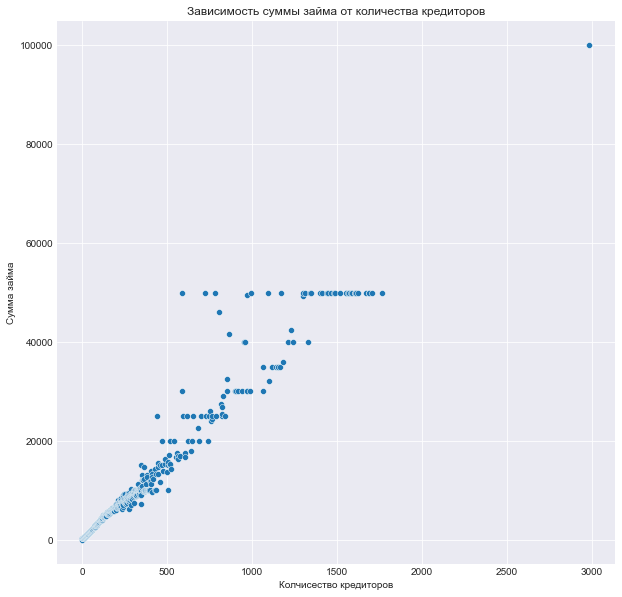

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(data=dependence_lender_count, x='lender_count', y='funded_amount', ax=ax, alpha=1)
ax.set_title('Зависимость суммы займа от количества кредиторов')
ax.set_xlabel('Колчисество кредиторов')
ax.set_ylabel('Сумма займа')

plt.show()

**Зависимость суммы займа от количества кредиторов**

1. Чем больше количество кредиторов, тем больше сумма займа. Это значит, что зачастую на один большой кредит деньги дает несколько кредиторов. Много людей готовы давать взаймы, но делают это небольшими суммами (примерно 500 долларов).

2. Непонятно с чем связаны такие скачки в точках при количестве кредиторов от ~600 до ~1300.

3. Прослеживается ряд точек в значениях суммы займа ~5000. Причины неизвестны.

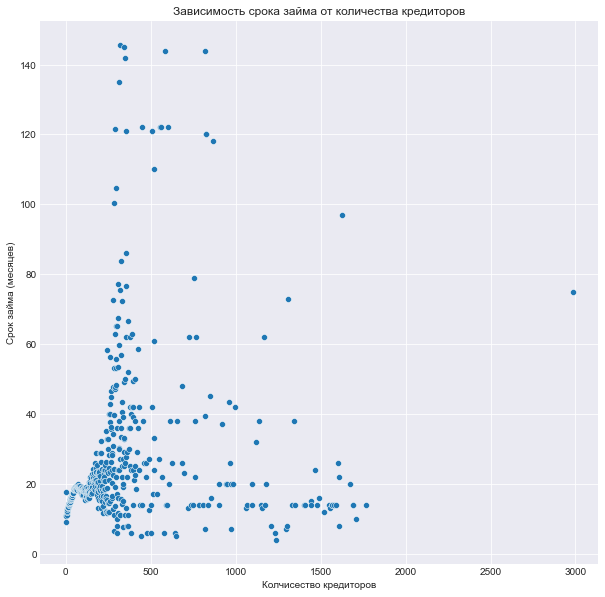

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(data=dependence_lender_count, x='lender_count', y='term_in_months', ax=ax, alpha=1)
ax.set_title('Зависимость срока займа от количества кредиторов')
ax.set_xlabel('Колчисество кредиторов')
ax.set_ylabel('Срок займа (месяцев)')

plt.show()

**Зависимость срока займа от количества кредиторов**

1. Количество кредиторов не влияет на срок займа.

2. Видно, что есть около 400 кредиторов, которые готовы выдавать займы на любой срок в интервале от 0 до 120.

# 2.4 Объем финансирования
* Проанализируем распределение сумм займа (какие суммы чаще выдают).
* Изучим несколько займов с очень большими суммами.
* Определим суммы займа в разрезе секторов. 

## 2.4.1 Анализ распределение сумм займа

In [39]:
loan_count_sorted = df_kiva_loans.groupby('funded_amount')['funded_amount'].count().sort_values(ascending=False)
loan_count_sorted.head(15)

funded_amount
225.0     34402
300.0     30676
200.0     27445
500.0     27318
250.0     26704
125.0     26254
400.0     23847
350.0     22270
325.0     21065
275.0     20093
175.0     19676
450.0     17251
1000.0    15930
150.0     15743
600.0     15096
Name: funded_amount, dtype: int64

1) Большая часть займов приходится на суммы ниже 500$, т.е. большей популярностью пользуются так называемые микрозаймы у компании Kiva. Должно быть, это связано с тем, что основные цели для кредита - это деньги на фильтр для воды и туалет.

2) Большие суммы не так популярны, скорее всего, именно из-за специфики проекта, он все-таки больше гуманитарный.

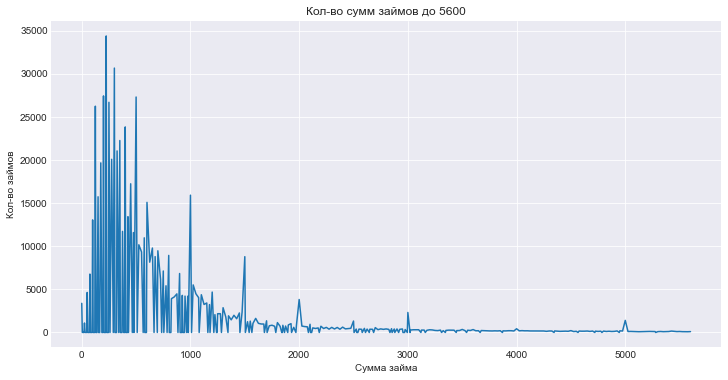

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

df_loan_amount_count = df_kiva_loans[df_kiva_loans['funded_amount'] <= 5600].groupby('funded_amount')['funded_amount'].count()
#ax.plot(df_loan_amount_count)

df_loan_amount_count

sns.lineplot(data=df_loan_amount_count, ax=ax)
ax.set_title('Кол-во сумм займов до 5600')
ax.set_xlabel('Сумма займа')
ax.set_ylabel('Кол-во займов')

plt.show()

На этом графике был взят промежуток от 0 до 5600, так как было выявлено, что 99% займов, приходится на суммы ниже 5600. Здесь, также, видно, что, по большей части, люди склонны брать займы ниже 1000, либо на круглые суммы по типу  1000, 1500 и тп.

## 2.4.2 Изучим несколько займов с очень большими суммами

In [41]:
loan_count_sorted = df_kiva_loans.sort_values(['funded_amount'], ascending=False)\
        [['funded_amount', 'use', 'country', 'borrower_genders']]
loan_count_sorted.head(30)

,funded_amount,use,country,borrower_genders
70499,100000.0,create more than 300 jobs for women and farmer...,Haiti,female
492809,50000.0,"to expand weather, farming information and fin...",Ghana,male
604502,50000.0,to add value and jobs to the local economy by ...,Benin,male
490191,50000.0,To purchase raw materials in order to produce ...,Ghana,male
126839,50000.0,to buy and plant resin producing pine trees. T...,Mexico,group
538248,50000.0,"to enable 5,000 additional small-holder farmer...",Kenya,male
408295,50000.0,to set up a garment social business that will ...,Albania,male
523659,50000.0,to train & equip 200 rural merchants in Mozamb...,Mozambique,female
565733,50000.0,to pay 600 farming families 100% above market ...,Ecuador,female
621860,50000.0,to distribute 400 pay-as-you-go solar home sys...,Kenya,male


Проанализируем несколько самых больших займов по таким критериям как цель(use), страна(country) и пол(borrower_genders):

1) Видно, что большинство людей берет займ для расширения бизнеса, рабочих мест и тп, большая часть относится к сектору Agriculture.

2) Страны, в которых берутся самые большие займы, как правило относятся к таким регионам как Африка, Южная Америка.

  Это связано с большой распространненостью Kiva и отсутвием других возможностей получить помощь. Например, в Северной Америке или Европе можно предложить свою идею людям с большими деньгами (таких там явно намного больше, чем в бедных странах) или воспользоваться венчурными фондами.

3) Пол, как видно из выборки, напрямую не коррелирует с величиной займа.

  Даже несмотря на то, что самый большой займ (и единственный) взяла девушка, это скорее случайность, а не закономерность. Для большой точности требуются дополнительные исследования, поэтому попробуем просуммировать все займы по половому признаку.


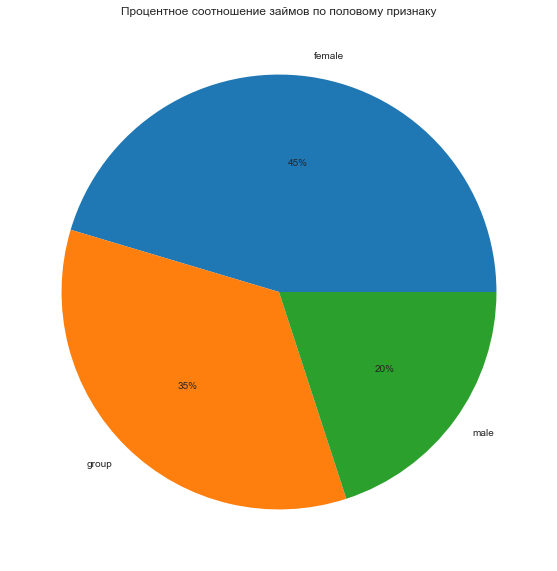

In [42]:
fig, ax = plt.subplots(figsize=(10,10))

df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]
df_gender_sum = df_kiva_loans.groupby('borrower_genders')[['funded_amount']].sum()

plt.pie(df_gender_sum['funded_amount'], labels=df_gender_sum.index, autopct='%1.0f%%')
plt.title('Процентное соотношение займов по половому признаку')

plt.show()

Взяв большую выборку, мы видим, что практически половина всех займов приходится на девушек. Более того, на мужчин приходится всего 20% от всех займов. Однако, ссылаясь на пункт 2.2.2, где было просуммировано кол-во всех займов по половому признаку, мы можем увидеть, что 64% кол-ва всех займов приходится на девушек, однако общая сумма всего 45%. У мужчин же 20% и там, и там. Тем самым можно сделать вывод, что девушки по большей части берут займы на небольшие суммы, несмотря на то, что самый большой займ приходится на них. А люди, состоящие в группе, наоборот, ориентируются на крупные займы.

## 2.4.3 Определите суммы займа в разрезе секторов

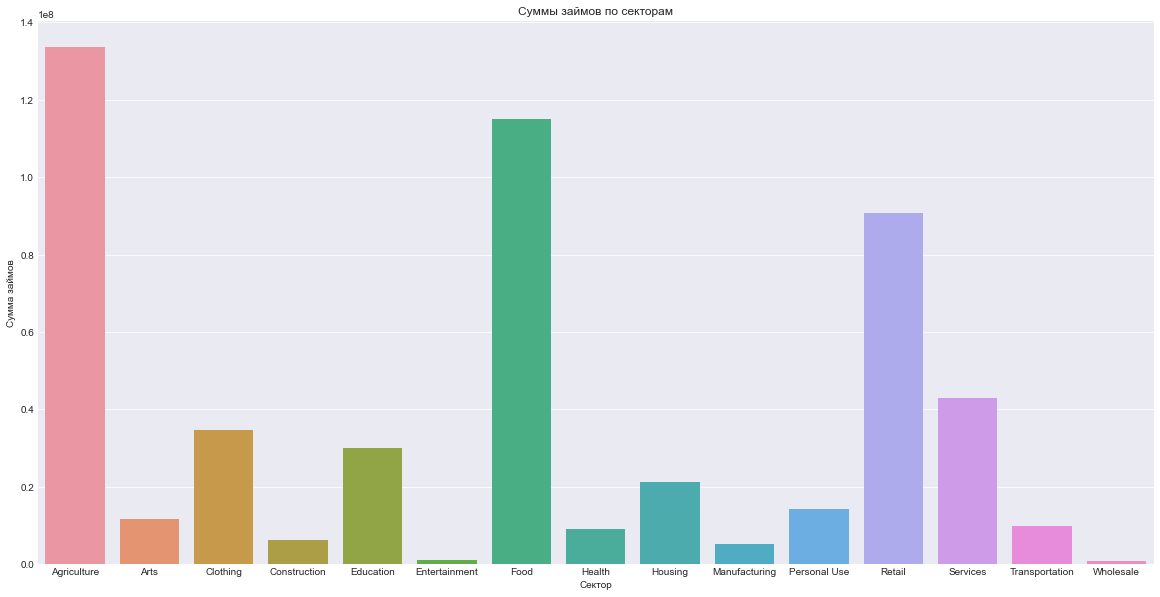

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))

df_sum_loans_by_sector = df_kiva_loans.groupby('sector')[['funded_amount', 'sector']].sum()

sns.barplot(x=df_sum_loans_by_sector.index, y=df_sum_loans_by_sector['funded_amount'], ax=ax)
ax.set_title('Суммы займов по секторам')
ax.set_xlabel('Сектор')
ax.set_ylabel('Сумма займов')

plt.show()

Больше всего средств поступает пользователям, занимающимся сельским хозяйством, пользователям, которые закупают еду, или пользователям для розничной торговли. Это связано с популярностью этих секторов у заемщиков.

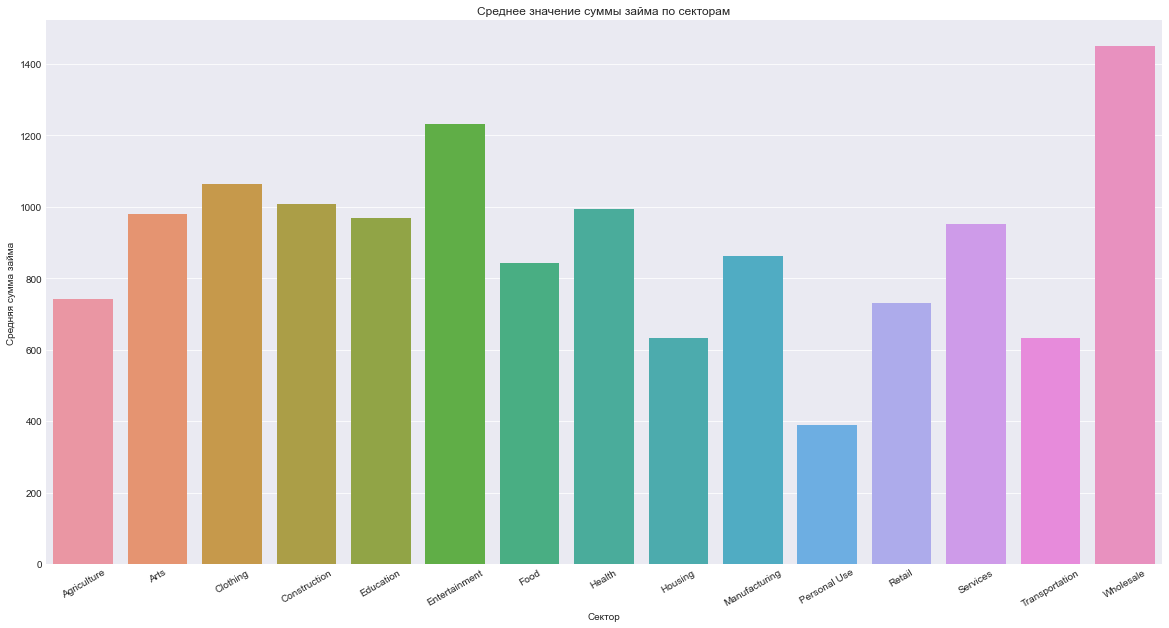

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))

df_mean_loans_by_sector = df_kiva_loans.groupby('sector')[['funded_amount', 'sector']].mean()

sns.barplot(x=df_mean_loans_by_sector.index, y=df_mean_loans_by_sector['funded_amount'], ax=ax)
plt.xticks(rotation=30)
ax.set_title('Среднее значение суммы займа по секторам')
ax.set_ylabel('Средняя сумма займа')
ax.set_xlabel('Сектор')

plt.show()

**Анализ суммы займа и средней суммы займа по секторам экономики**

1. Наиболее популярные сектора экономики (Сельское хозяйство, Еда, Розница) нуждаются лишь в кредитах на относительно маленькие суммы, но количество кредиторов в этих секторах большое.

2. Оставшиеся сектора экономики имеют совсем небольше суммы кредита, но выравниваются в диаграмме средних займов с показателями лидеров первой таблицы. Должно быть, эти сектора требуют больше вложений, но меньше людей в них заходят.

3. Хочется отдельно отметить лидеров второй таблицы - Развлечения и Оптовые продажи. Их средние суммы самые высокие, это из-за того, что данные области требуют больших вложений и финансирования. Их суммы займов говорят о том, что заемщиков в этих секторах мало, и кредиторы вкладываются лишь в тех, кто владеет действительно крутыми идеями.

## 2.4.4 Выводы по разделу

Из графиков выше можно сделать такие выводы:

1. Как правило, большие займы берут люди, состоящие в группах, девушки же, больше склонны брать микрозаймы, несмотря на то, что самый большой займ приходится на девушку.
2. Самыми популярными секторами являются Agriculture, Food, Retail.

Также возьмем во внимание таблицу из пункта 2.3.3 с целями займа и графики из пунктов 2.4.2 и 2.4.3. Из этих данных можно сделать следующие выводы:
1. Люди, берущие займы для сектора Agriculture, берут займы для поддержание своего хозяйства, расширение или увеличение рабочих мест.
2. Люди, берущие займы для сектора Food, берут займы для необходимых жизненных потребностей, более того, таких людей очень много, так как данный сектор - второй по сумме всех займов. Очень много нуждающихся в пропитании людей из стран третьего мира обращаются за помощью к Kiva. Это также видно в таблице 2.4.1 - очень много заявок на микрозаймы.